# Analyses des résultats du sondage

Il s'agira ici d'analyser les données du sondage fait au près des élèves de Polytech Sorbonne quand à leur ressenti vis à vis du fonctionnement à distance.

*À noter que le nombre de sondés est beaucoup trop faible pour tirer des conclusions statistiques rigoureuses mais il reste intéressant de repèrer les éventuelles corrélations, ne serait ce qu'à titre indicatif*

In [30]:
import pandas as pd
import numpy as np
import scipy
import copy
import seaborn as sn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

sn.set(rc={'figure.figsize':(13,13)})

pd.set_option("display.max_rows", 15)



## Extraction et nettoyage des données

On extrait les données du fichier csv exporté depuis google forms et on les nettoies :

- On fait un choix plus ou moins arbitraire des données que l'on souhaite exploiter, certaines étant plus pertinantes que d'autres

- On ajoute deux colonnes dont les données sont boolénnes, l'une indiquant si la personne sondée est en alternance, et l'autre si sa spécialité relève du numérique

- On code les données textuelles en données numériques (Arbitraires si la donnée est catégorique (i.e. la spécialité) ou croissantes si la donnée est un gradiant (i.e.la qualité de l'enseignement), et booléenne si la données porte deux valeures)

- On supprime les lignes portant des données deffectueuses (Cases vides/mal formattées)

In [31]:
DF = pd.read_csv("Questionnaire Bilan 2020-2021.csv")
DFtext = DF[DF.columns[[8, 14, 15, 21, 22]]]

DF


Horodateur                          Nom d'utilisateur  \
0     2021/05/20 6:41:22 PM UTC+2     olivia.phav@etu.sorbonne-universite.fr   
1     2021/05/20 6:43:16 PM UTC+2                       ewhanley99@gmail.com   
2     2021/05/20 6:45:17 PM UTC+2                   elise.rebeyren@gmail.com   
3     2021/05/20 6:45:25 PM UTC+2                 alexandra.deac@etu.upmc.fr   
4     2021/05/20 6:46:15 PM UTC+2               morin.vincent.math@gmail.com   
..                            ...                                        ...   
196   2021/06/04 9:20:26 AM UTC+2                  lefranc.oceaane@gmail.com   
197  2021/06/04 11:10:13 AM UTC+2                        ndiopfall@gmail.com   
198   2021/06/04 3:43:01 PM UTC+2  camille.douzet@etu.sorbonne-universite.fr   
199   2021/06/05 6:48:01 PM UTC+2                     yahyakadu94@hotmail.fr   
200   2021/06/05 6:53:50 PM UTC+2                       aziri.hamza@yahoo.fr   

    Ta spécialité ?  Ton Année ? Moralement, comment ça va (globalement) ?  \
0               Rob            3                                     ça va   
1               Rob            3                           c'est compliqué   
2             Agral            3                                     ça va   
3              Eise            4                                     ça va   
4               Rob            4                                     ça va   
..              ...          ...                                       ...   
196           Agral            4                                     ça va   
197           Agral            3                                  Détresse   
198            Ei2i            3                             on s'accroche   
199             Mtx            3                           c'est compliqué   
200             Mtx            3                             on s'accroche   

                Intégration dans l'école (pour les 3A)  \
0                         C'est moyen mais je m'adapte   
1                                         Tout va bien   
2                                         Tout va bien   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
196                                                NaN   
197                                       Tout va bien   
198  J'ai de moins en moins de contact avec les autres   
199  J'ai de moins en moins de contact avec les autres   
200                       C'est moyen mais je m'adapte   

     Comment as-tu vécu ce SEMESTRE ? (1=décrochage scolaire, 10=finger in the nose)  \
0                                                    7                                 
1                                                    4                                 
2                                                    8                                 
3                                                    6                                 
4                                                    5                                 
..                                                 ...                                 
196                                                  6                                 
197                                                  3                                 
198                                                  4                                 
199                                                  2                                 
200                                                  7                                 

     Comment as-tu vécu l'ANNÉE globalement ? (1=décrochage scolaire, 10=finger in the nose)  \
0                                                    7                                         
1                                                    3                                         
2                                                    7                             

In [32]:
DF = DF.drop(DF.columns[[0, 1, 8, 9, 12, 14, 15, 21, 22]], axis = 1)
DF

Ta spécialité ?  Ton Année ? Moralement, comment ça va (globalement) ?  \
0               Rob            3                                     ça va   
1               Rob            3                           c'est compliqué   
2             Agral            3                                     ça va   
3              Eise            4                                     ça va   
4               Rob            4                                     ça va   
..              ...          ...                                       ...   
196           Agral            4                                     ça va   
197           Agral            3                                  Détresse   
198            Ei2i            3                             on s'accroche   
199             Mtx            3                           c'est compliqué   
200             Mtx            3                             on s'accroche   

                Intégration dans l'école (pour les 3A)  \
0                         C'est moyen mais je m'adapte   
1                                         Tout va bien   
2                                         Tout va bien   
3                                                  NaN   
4                                                  NaN   
..                                                 ...   
196                                                NaN   
197                                       Tout va bien   
198  J'ai de moins en moins de contact avec les autres   
199  J'ai de moins en moins de contact avec les autres   
200                       C'est moyen mais je m'adapte   

     Comment as-tu vécu ce SEMESTRE ? (1=décrochage scolaire, 10=finger in the nose)  \
0                                                    7                                 
1                                                    4                                 
2                                                    8                                 
3                                                    6                                 
4                                                    5                                 
..                                                 ...                                 
196                                                  6                                 
197                                                  3                                 
198                                                  4                                 
199                                                  2                                 
200                                                  7                                 

     Comment as-tu vécu l'ANNÉE globalement ? (1=décrochage scolaire, 10=finger in the nose)  \
0                                                    7                                         
1                                                    3                                         
2                                                    7                                         
3                                                    7                                         
4                                                    5                                         
..                                                 ...                                         
196                                                  7                                         
197                                                  3                                         
198                                                  4                                         
199                                                  2                                         
200                                                  5                                         

              Durant ce semestre, tu as été  \
0    De façon hybride (TP + certains cours)   
1              En partie en présentiel (TP)   
2              En p

In [33]:

#Renommage des colonnes pour faciliter le code
DF.columns = ['spe', 'annee', 'morale', 'inte', 'vecu sem', 'vecu an', 'heures TP', 'moyenne concentration cours', 'qualité enseignements', 'suivi par les enseignants?', 'peur résultats?', 'peur diplome?', 'stage', 'mobilité']


In [34]:
#On sauvegarde les données dans un back up dataframe au cas où on en a besoin
DF1 = copy.deepcopy(DF)
DF

spe  annee           morale  \
0      Rob      3            ça va   
1      Rob      3  c'est compliqué   
2    Agral      3            ça va   
3     Eise      4            ça va   
4      Rob      4            ça va   
..     ...    ...              ...   
196  Agral      4            ça va   
197  Agral      3         Détresse   
198   Ei2i      3    on s'accroche   
199    Mtx      3  c'est compliqué   
200    Mtx      3    on s'accroche   

                                                  inte  vecu sem  vecu an  \
0                         C'est moyen mais je m'adapte         7        7   
1                                         Tout va bien         4        3   
2                                         Tout va bien         8        7   
3                                                  NaN         6        7   
4                                                  NaN         5        5   
..                                                 ...       ...      ...   
196                                                NaN         6        7   
197                                       Tout va bien         3        3   
198  J'ai de moins en moins de contact avec les autres         4        4   
199  J'ai de moins en moins de contact avec les autres         2        2   
200                       C'est moyen mais je m'adapte         7        5   

                                  heures TP moyenne concentration cours  \
0    De façon hybride (TP + certains cours)                   1h - 1h30   
1              En partie en présentiel (TP)                  30min - 1h   
2              En partie en présentiel (TP)                  30min - 1h   
3              En partie en présentiel (TP)                   1h - 1h30   
4    De façon hybride (TP + certains cours)                  30min - 1h   
..                                      ...                         ...   
196            En partie en présentiel (TP)                  30min - 1h   
197  De façon hybride (TP + certains cours)              moins de 30min   
198  De façon hybride (TP + certains cours)              moins de 30min   
199                Totalement en distanciel                   1h30 - 2h   
200  De façon hybride (TP + certains cours)                   1h - 1h30   

    qualité enseignements suivi par les enseignants? peur résultats?  \
0                   Moyen                      ça va             Non   
1                   Moyen               Pas vraiment             Oui   
2                    Bien                      ça va             Non   
3                    Bien                        Oui             Non   
4                   Moyen                      ça va             Non   
..                    ...                        ...             ...   
196                 Moyen               Pas vraiment  Je ne sais pas   
197                 Moyen                      ça va             Oui   
198               Mauvais               Pas vraiment             Non   
199                  Bien               Pas vraiment             Oui   
200                  Bien                        Oui             Oui   

      peur diplome?                                              stage  \
0               Non                 J'ai trouvé mon stage, tout est OK   
1    Je ne sais pas                                  Je cherche encore   
2               Non                 J'ai trouvé mon stage, tout est OK   
3               Non                 J'ai trouvé mon stage, tout est OK   
4               Non  J'ai trouvé mais je suis dans les démarches ad...   
..              ...                                                ...   
196             Non                 J'ai trouvé mon stage, tout est OK   
197  Je ne sais pas                 J'ai trouvé mon stage, tout est OK   
198             Non                         Pas concerné (5A ou autre)   
199             Non                                  Je cherche encore   
200             Non                 J'ai trou

In [35]:
DF = DF1
#On code la spé en 8 entiers 
DF.loc[DF.spe == 'Main', 'spe'] = 1
DF.loc[DF.spe == 'Mtx', 'spe'] = 2
DF.loc[DF.spe == 'Agral', 'spe'] = 3
DF.loc[DF.spe == 'Rob', 'spe'] = 4
DF.loc[DF.spe == 'GM', 'spe'] = 5
DF.loc[DF.spe == 'Ei2i', 'spe'] = 6
DF.loc[DF.spe == 'Eise', 'spe'] = 7
DF.loc[DF.spe == 'St', 'spe'] = 8
DF['spe'] = DF['spe'].astype(float)

#On ajoute les colonnes alternance et num?
a = np.zeros(201)
DF["Alternance?"] = a

DF.loc[DF.spe == 6, 'Alternance?'] = 1
DF.loc[DF.spe == 5, 'Alternance?'] = 1
       
DF["Num?"] = a

DF.loc[DF.spe == 1, 'Num?'] = 1
DF.loc[DF.spe == 4, 'Num?'] = 1
DF.loc[DF.spe == 6, 'Num?'] = 1
DF.loc[DF.spe == 7, 'Num?'] = 1


#On code la colonne heures TP
DF.loc[DF["heures TP"] == 'Totalement en distanciel', 'heures TP'] = 1
DF.loc[DF["heures TP"] == 'En partie en présentiel (TP)', 'heures TP'] = 2
DF.loc[DF["heures TP"] == 'De façon hybride (TP + certains cours)', 'heures TP'] = 3
DF['heures TP'] = DF['heures TP'].astype(float)

#On code la colonne qualité enseignements par un gradient de 0 à 4
DF.loc[DF["qualité enseignements"] == 'Très mauvais', 'qualité enseignements'] = 0
DF.loc[DF["qualité enseignements"] == 'Mauvais', 'qualité enseignements'] = 1
DF.loc[DF["qualité enseignements"] == 'Moyen', 'qualité enseignements'] = 2
DF.loc[DF["qualité enseignements"] == 'Bien', 'qualité enseignements'] = 3
DF.loc[DF["qualité enseignements"] == 'Très bien', 'qualité enseignements'] = 4
DF['qualité enseignements'] = DF['qualité enseignements'].astype(float)

#On code la colonne moyenne concentration cours par des floats correspondant à la borne inf des réponses en heures
Dictmap0 = {"La totalité": 2, "1h30 - 2h": 1.5, "1h - 1h30": 1, "30min - 1h": 0.5, "Moins de 30min": 0}
DF["moyenne concentration cours"] = DF["moyenne concentration cours"].map(Dictmap0)

#Peur des résultats
DF.loc[DF["peur résultats?"] == 'Oui', 'peur résultats?'] = 1
DF.loc[DF["peur résultats?"] == 'Non', 'peur résultats?'] = 0
DF.loc[DF["peur résultats?"] == 'Je ne sais pas', 'peur résultats?'] = 0.5

DF.loc[DF["peur diplome?"] == 'Oui', 'peur diplome?'] = 1
DF.loc[DF["peur diplome?"] == 'Non', 'peur diplome?'] = 0
DF.loc[DF["peur diplome?"] == 'Je ne sais pas', 'peur diplome?'] = 0.5

#Suivi par les enseignats
DF.loc[DF["suivi par les enseignants?"] == 'Oui', 'suivi par les enseignants?'] = 3
DF.loc[DF["suivi par les enseignants?"] == 'ça va', 'suivi par les enseignants?'] = 2
DF.loc[DF["suivi par les enseignants?"] == 'Pas vraiment', 'suivi par les enseignants?'] = 1
DF.loc[DF["suivi par les enseignants?"] == 'Pas du tout', 'suivi par les enseignants?'] = 0

DF.loc[DF["inte"] == 'Tout va bien', 'inte'] = 3
DF.loc[DF["inte"] == "C'est moyen mais je m'adapte", 'inte'] = 2
DF.loc[DF["inte"] == 'J\'ai de moins en moins de contact avec les autres', 'inte'] = 1
DF.loc[DF["inte"] == 'Je me sens isolé, j\'ai l\'impression de perdre des années importantes', 'inte'] = 0

DF.loc[DF["morale"] == 'Le Bonheur', 'morale'] = 4
DF.loc[DF["morale"] == 'ça va', 'morale'] = 3
DF.loc[DF["morale"] == 'on s\'accroche', 'morale'] = 2
DF.loc[DF["morale"] == 'c\'est compliqué', 'morale'] = 1
DF.loc[DF["morale"] == 'Détresse', 'morale'] = 0

DF.loc[DF["stage"] == 'Pas concerné (5A ou autre)', 'stage'] = np.nan
DF.loc[DF["stage"] == 'Je ne cherche pas', 'stage'] = np.nan
DF.loc[DF["stage"] == 'J\'ai trouvé mon stage, tout est OK', 'stage'] = 1
DF.loc[DF["stage"] == 'J\'ai trouvé mais je suis dans les démarches administratives', 'stage'] = 0.5
DF.loc[DF["stage"] == 'Je cherche encore', 'stage'] = 0


DF.loc[DF["mobilité"] == "Pas concerné (5A ou autre)", 'mobilité'] = np.nan
DF.loc[DF["mobilité"] == "Je suis en 3A et je ne m'en occupe pas encore", 'mobilité'] = np.nan
DF.loc[DF["mobilité"] == "Je suis en 4A et j'ai trouvé un stage à l'étranger", 'mobilité'] = 1
DF.loc[DF["mobilité"] == "Je suis en 4A et j'ai trouvé un semestre à l'étranger", 'mobilité'] = 1
DF.loc[DF["mobilité"] == "Je suis en 3A et j'ai trouvé un stage à l'étranger", 'mobilité'] = 1
DF.loc[DF["mobilité"] == "Je suis en 3A et j'ai trouvé un semestre à l'étranger", 'mobilité'] = 1
DF.loc[DF["mobilité"] == "Je suis en 4A et je ne sais pas quoi faire, ça me stresse", 'mobilité'] = 0



for i in DF.columns:
    DF[i].fillna((DF[i].mean()), inplace=True)

DF


spe  annee  morale      inte  vecu sem  vecu an  heures TP  \
0    4.0      3       3  2.000000         7        7        3.0   
1    4.0      3       1  3.000000         4        3        2.0   
2    3.0      3       3  3.000000         8        7        2.0   
3    7.0      4       3  2.168224         6        7        2.0   
4    4.0      4       3  2.168224         5        5        3.0   
..   ...    ...     ...       ...       ...      ...        ...   
196  3.0      4       3  2.168224         6        7        2.0   
197  3.0      3       0  3.000000         3        3        3.0   
198  6.0      3       2  1.000000         4        4        3.0   
199  2.0      3       1  1.000000         2        2        1.0   
200  2.0      3       2  2.000000         7        5        3.0   

     moyenne concentration cours  qualité enseignements  \
0                       1.000000                    2.0   
1                       0.500000                    2.0   
2                       0.500000                    3.0   
3                       1.000000                    3.0   
4                       0.500000                    2.0   
..                           ...                    ...   
196                     0.500000                    2.0   
197                     0.889937                    2.0   
198                     0.889937                    1.0   
199                     1.500000                    3.0   
200                     1.000000                    3.0   

     suivi par les enseignants?  peur résultats?  peur diplome?     stage  \
0                             2              0.0            0.0  1.000000   
1                             1              1.0            0.5  0.000000   
2                             2              0.0            0.0  1.000000   
3                             3              0.0            0.0  1.000000   
4                             2              0.0            0.0  0.500000   
..                          ...              ...            ...       ...   
196                           1              0.5            0.0  1.000000   
197                           2              1.0            0.5  1.000000   
198                           1              0.0            0.0  0.655844   
199                           1              1.0            0.0  0.000000   
200                           3              1.0            0.0  1.000000   

     mobilité  Alternance?  Num?  
0    0.745098          0.0   1.0  
1    0.745098          0.0   1.0  
2    0.745098          0.0   0.0  
3    1.000000          0.0   1.0  
4    1.000000          0.0   1.0  
..        ...          ...   ...  
196  0.745098          0.0   0.0  
197  0.745098          0.0   0.0  
198  0.745098          1.0   1.0  
199  0.745098          0.0   0.0  
200  0.745098          0.0   0.0  

[201 rows x 16 columns]

## Analyse des données numériques

### Matrice de corrélation

On commence par tracer la matrice de correlation pour extraire les couples de données qu'il pourrait être intéressant de représenter. 

<AxesSubplot:>

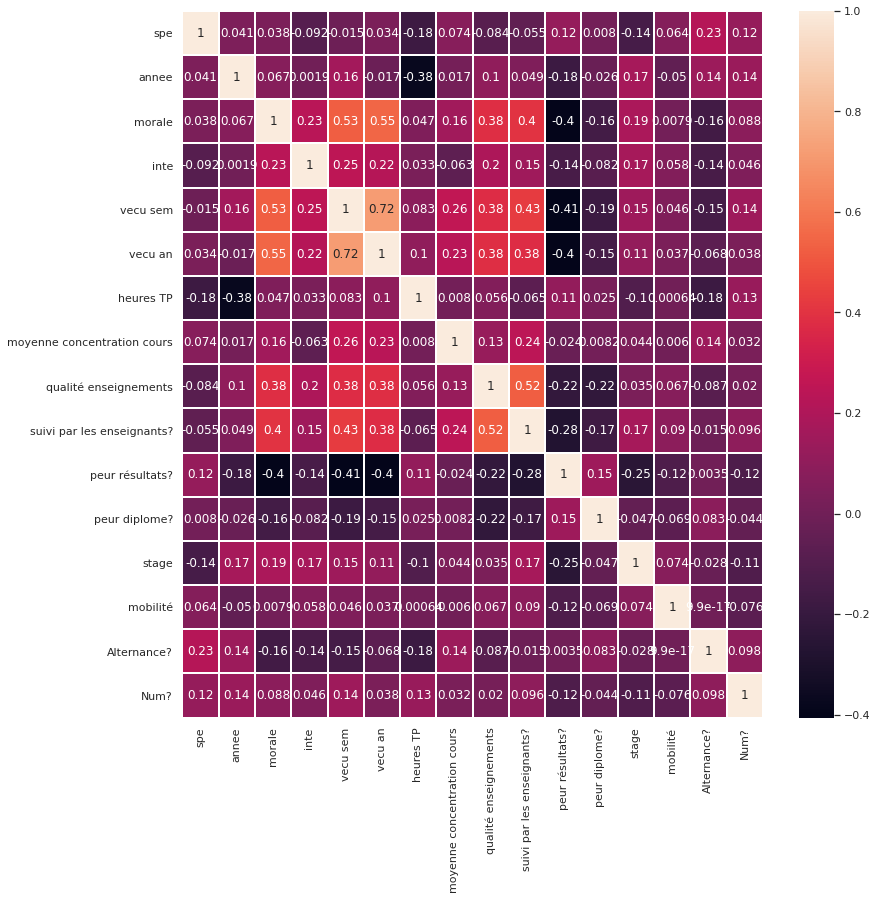

In [36]:
corr = DF.corr()
sn.heatmap(corr, annot=True, linewidths=2)

### Représentations 

#### Moyenne de concentration en cours en fonction de la spécialité

Text(0.5, 1.0, 'Moyenne de concentration en cours en fonction de la spécialité')

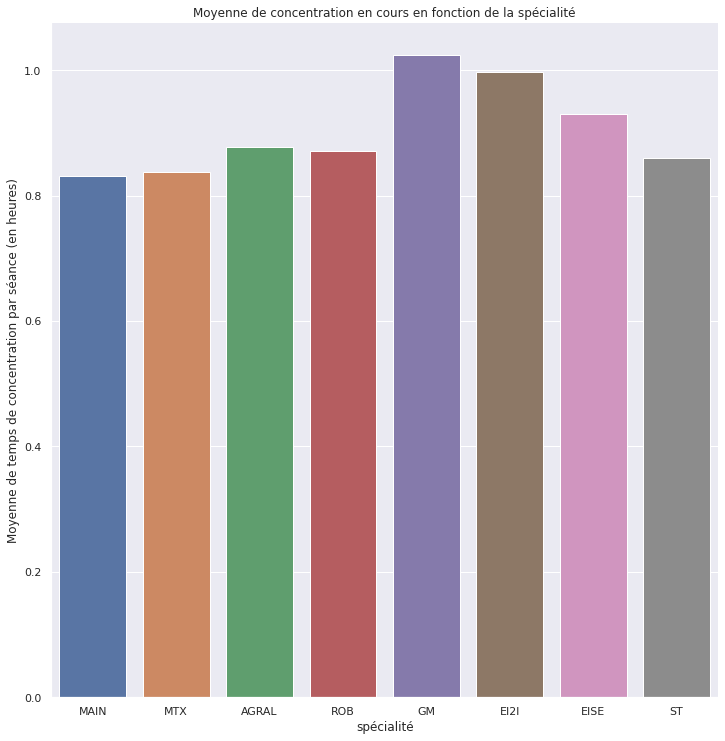

In [37]:
a = sn.catplot(x="spe", y="moyenne concentration cours", kind="bar", data=DF, height = 10, ci = None)
a.set(xticklabels=["MAIN","MTX","AGRAL","ROB","GM","EI2I","EISE", "ST"])
plt.ylabel("Moyenne de temps de concentration par séance (en heures)")
plt.xlabel("spécialité")
plt.title("Moyenne de concentration en cours en fonction de la spécialité")


#### Peur des résultats en cours en fonction de la spécialité

Text(0.5, 1.0, 'Avez vous peur des résultats?')

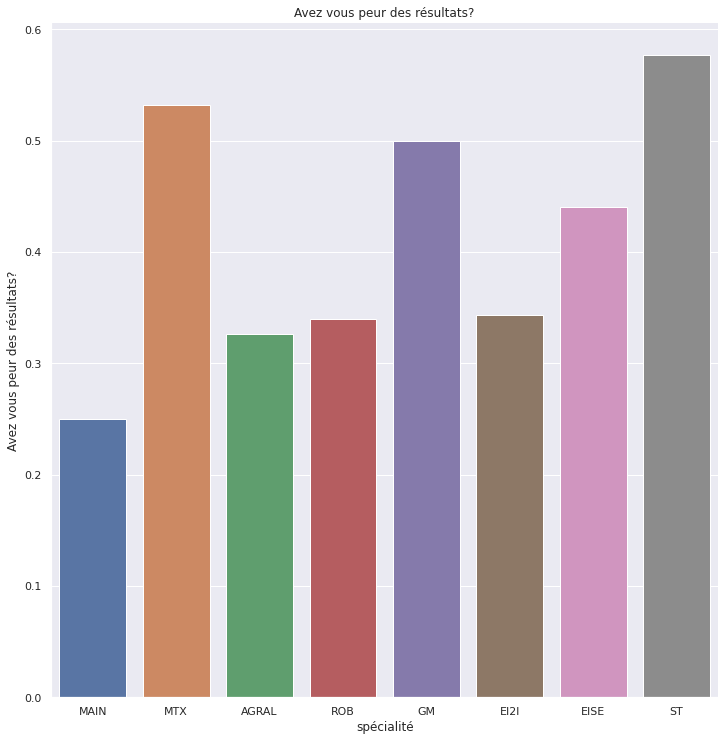

In [38]:
a = sn.catplot(x="spe", y="peur résultats?", kind="bar", data=DF, height = 10, ci = None)
a.set(xticklabels=["MAIN","MTX","AGRAL","ROB","GM","EI2I","EISE", "ST"])
plt.ylabel("Avez vous peur des résultats?")
plt.xlabel("spécialité")
plt.title("Avez vous peur des résultats?")


#### Recherche de stage en fonction de la spécialité

Text(0.5, 1.0, "Avez vous trouvé un stage? (Echelle de 0 à 1 selon l'avancemenant de la démarche)")

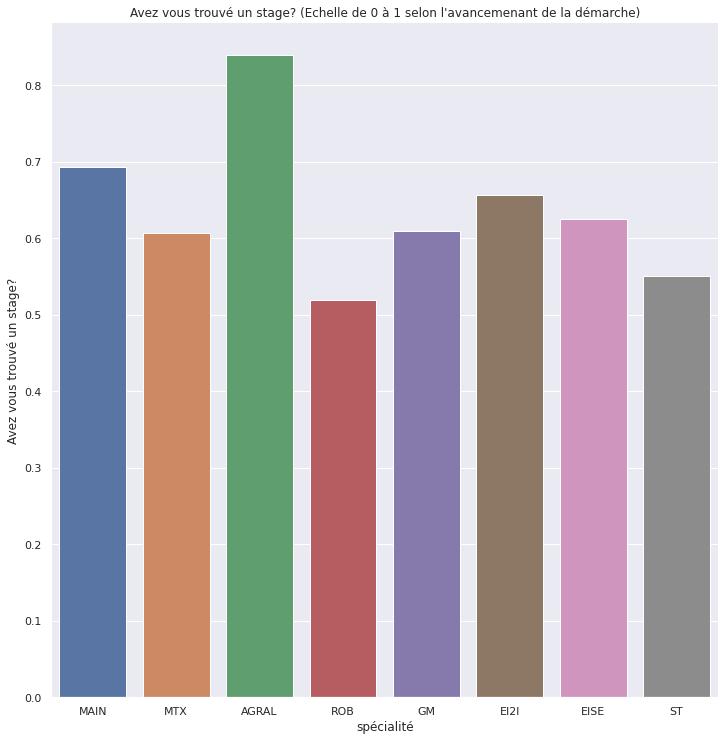

In [39]:
a = sn.catplot(x="spe", y="stage", kind="bar", data=DF, height = 10, ci = None)
a.set(xticklabels=["MAIN","MTX","AGRAL","ROB","GM","EI2I","EISE", "ST"])
plt.ylabel("Avez vous trouvé un stage?")
plt.xlabel("spécialité")
plt.title("Avez vous trouvé un stage? (Echelle de 0 à 1 selon l'avancemenant de la démarche)" )


#### Peur des résultats en cours en fonction de l'année

Text(0.5, 1.0, 'Avez vous peur des résultats?')

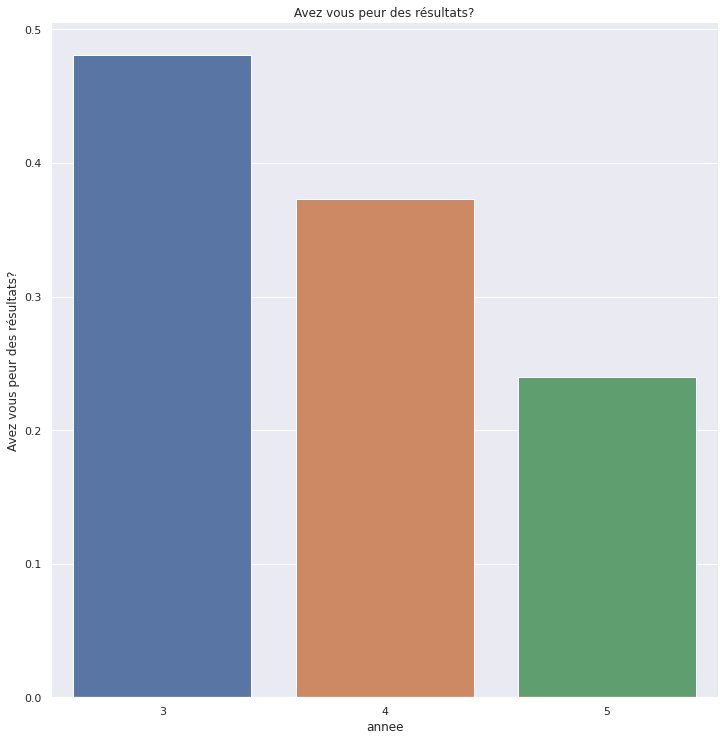

In [40]:
a = sn.catplot(x="annee", y="peur résultats?", kind="bar", data=DF, height = 10, ci = None)
a.set(xticklabels=["3","4","5"])
plt.ylabel("Avez vous peur des résultats?")
plt.xlabel("annee")
plt.title("Avez vous peur des résultats?")

### Peur des résultats en fonction de l'année

0.0    0.428571
1.0    0.390476
0.5    0.180952
Name: peur résultats?, dtype: float64


Text(0.5, 1.0, 'Avez vous peur des résultats?')

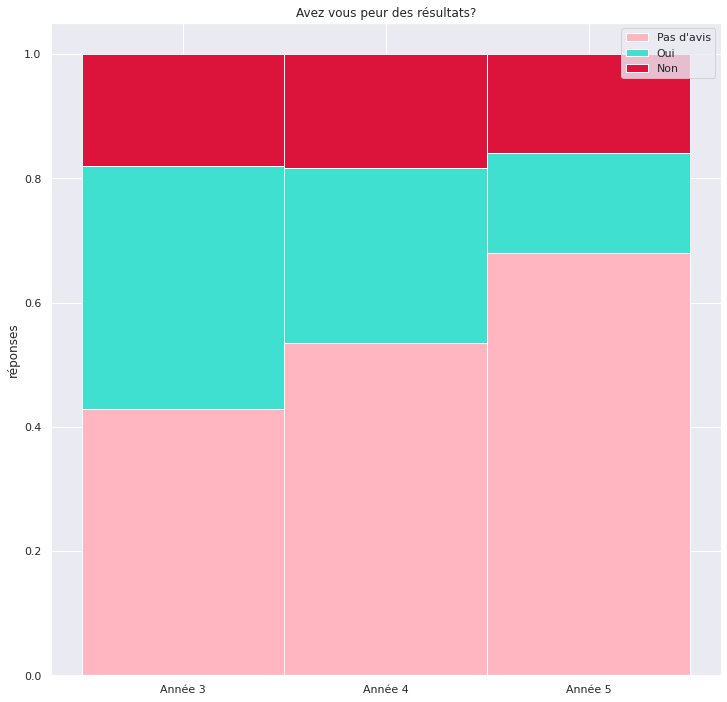

In [41]:
l3 = []
l4 = []
l5 = []

print(DF[DF.annee==3]["peur résultats?"].value_counts(normalize=True))

for i in [0, 0.5, 1]:
 l3.append(DF[DF.annee==3]["peur résultats?"].value_counts(normalize=True)[i])
 l4.append(DF[DF.annee==4]["peur résultats?"].value_counts(normalize=True)[i])
 l5.append(DF[DF.annee==5]["peur résultats?"].value_counts(normalize=True)[i])

l = np.transpose(np.array([l3, l4, l5]))

r = range(3)
barwidth = 1
colors = ['#FF9999', '#00BFFF','#C1FFC1','#CAE1FF','#FFDEAD']
plt.figure(figsize = (12, 12))
plt.bar(r, l[0], color = "lightpink", width = 1, label = "Pas d'avis")
plt.bar(r, l[2], color = "turquoise",bottom=np.array(l[0]), width = 1, label = "Oui")
plt.bar(r, l[1], color = "crimson", bottom=np.array(l[0]) + np.array(l[2]), width = 1, label = "Non")
plt.legend()

plt.xticks(r, ["Année 3", "Année 4", "Année 5"])
plt.ylabel("réponses")
plt.title("Avez vous peur des résultats?")

#### Vécu semestriel en fonction la qualité des enseignements

*À nuancer : une personne aura plus tendance à juger la qualité de enseignements bonnes si elle dit bien vivre le semstre*

Text(0.5, 1.0, 'Vécu du semestre en fonction de la qualité perçue des enseignements')

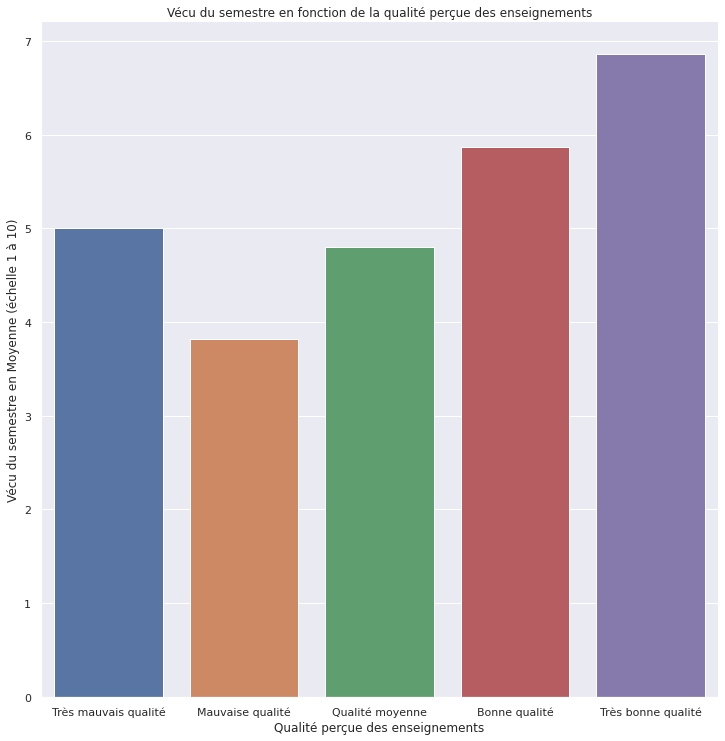

In [42]:
a = sn.catplot(x="qualité enseignements", y="vecu an", kind="bar", data=DF, height = 10, ci = None)
a.set(xticklabels=["Très mauvais qualité","Mauvaise qualité", "Qualité moyenne", "Bonne qualité","Très bonne qualité"])
plt.ylabel("Vécu du semestre en Moyenne (échelle 1 à 10)")
plt.xlabel("Qualité perçue des enseignements")
plt.title("Vécu du semestre en fonction de la qualité perçue des enseignements")

#### Vécu semestriel en fonction de combien on se sent suivi par les enseignants


Text(0.5, 1.0, 'Vécu du semestre en fonction du suivi des enseignants')

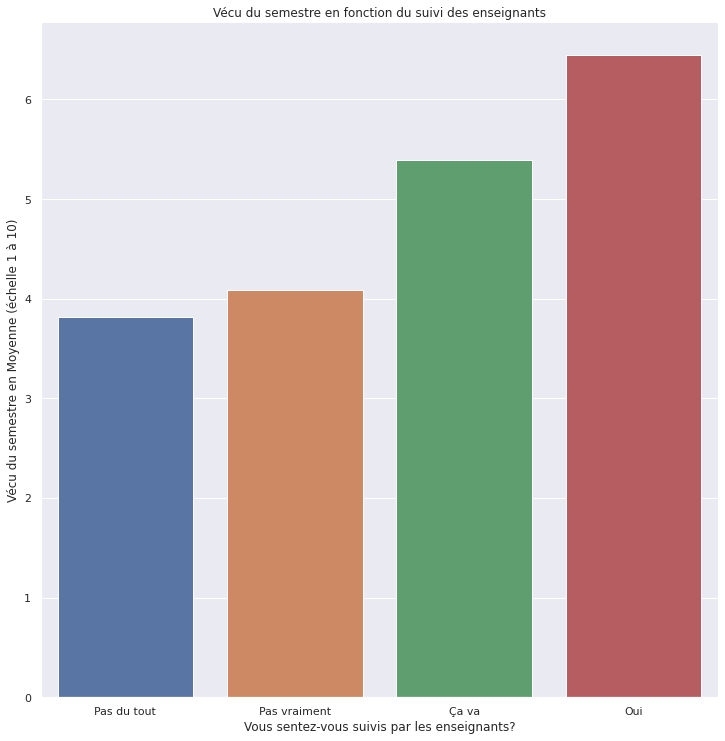

In [43]:
a = sn.catplot(x="suivi par les enseignants?", y="vecu sem", kind="bar", data=DF, height = 10, ci = None)
a.set(xticklabels=["Pas du tout","Pas vraiment", "Ça va", "Oui"])
plt.ylabel("Vécu du semestre en Moyenne (échelle 1 à 10)")
plt.xlabel("Vous sentez-vous suivis par les enseignants?")
plt.title("Vécu du semestre en fonction du suivi des enseignants")

#### Qualité perçue des enseignements en fonction du type de formation

Text(0.5, 1.0, 'Qualité perçue des enseignements en fonction du type de formation')

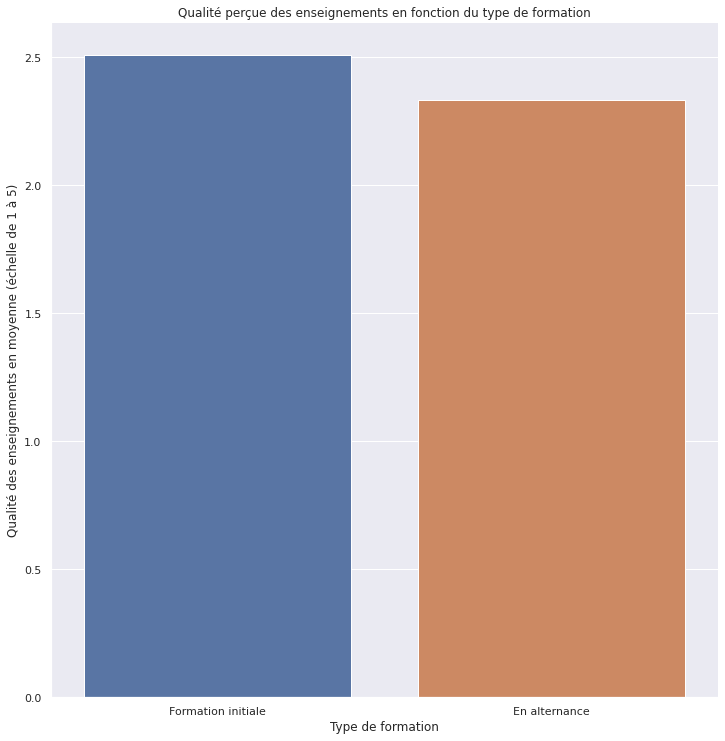

In [44]:
a = sn.catplot(x="Alternance?", y="qualité enseignements", kind="bar", data=DF, height = 10, ci = None)
a.set(xticklabels=["Formation initiale", "En alternance"])
plt.ylabel("Qualité des enseignements en moyenne (échelle de 1 à 5)")
plt.xlabel("Type de formation")
plt.title("Qualité perçue des enseignements en fonction du type de formation")

#### Morale en fonction du type de formation

Text(0.5, 1.0, 'Morale en fonction du type de formation')

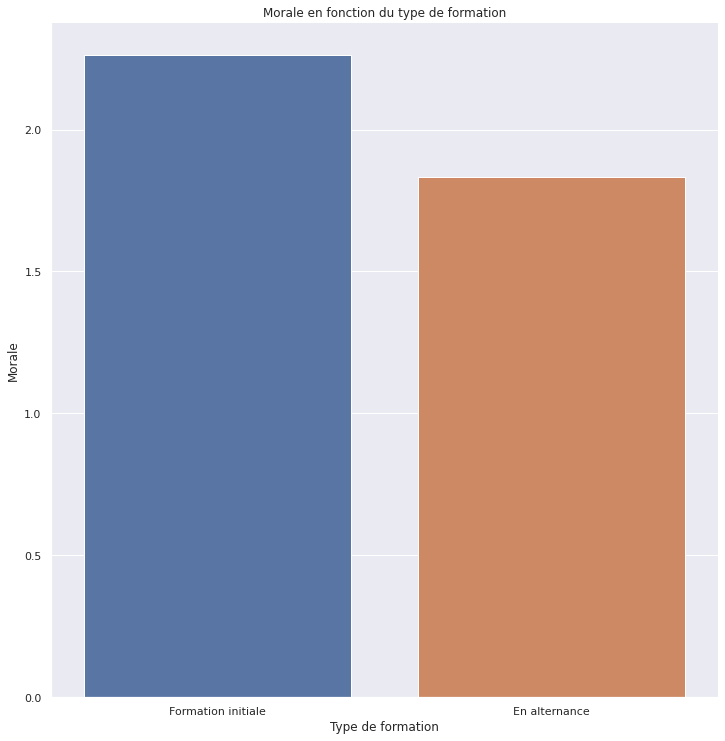

In [45]:
a = sn.catplot(x="Alternance?", y="morale", kind="bar", data=DF, height = 10, ci = None)
a.set(xticklabels=["Formation initiale", "En alternance"])
plt.ylabel("Morale")
plt.xlabel("Type de formation")
plt.title("Morale en fonction du type de formation")

#### Qualité perçue des enseignements en fonction de si la spécialité relève du numérique

Text(0.5, 1.0, 'Qualité perçue des enseignements en fonction de si la spécialité relève du numérique')

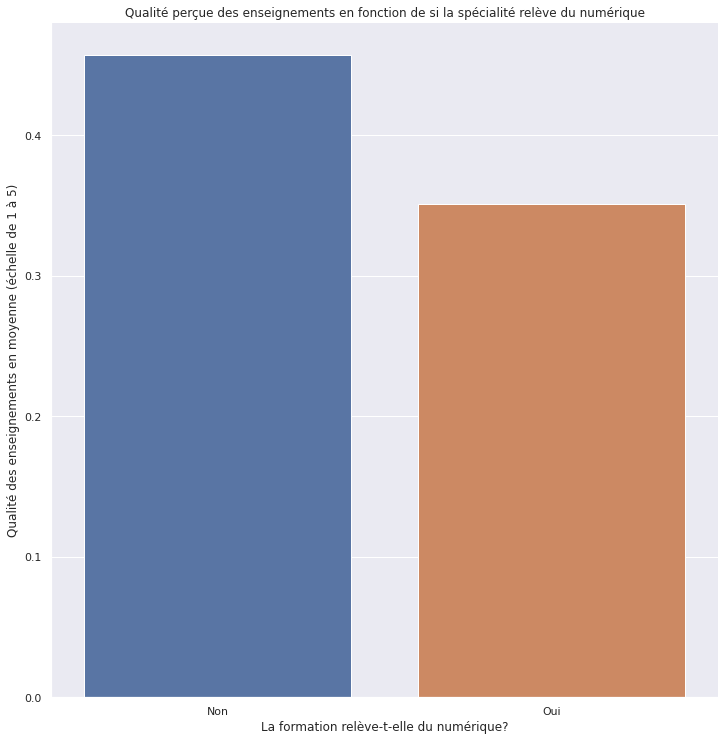

In [46]:
a = sn.catplot(x="Num?", y="peur résultats?", kind="bar", data=DF, height = 10, ci = None)
a.set(xticklabels=["Non", "Oui"])
plt.ylabel("Qualité des enseignements en moyenne (échelle de 1 à 5)")
plt.xlabel("La formation relève-t-elle du numérique?")
plt.title("Qualité perçue des enseignements en fonction de si la spécialité relève du numérique")

#### Heat map de la qualité perçue des enseignements en fonction de la spécialité et de l'année


Text(0.5, 1.0, "Heat map de la qualité perçue des enseignements en fonction de la spécialité et de l'année")

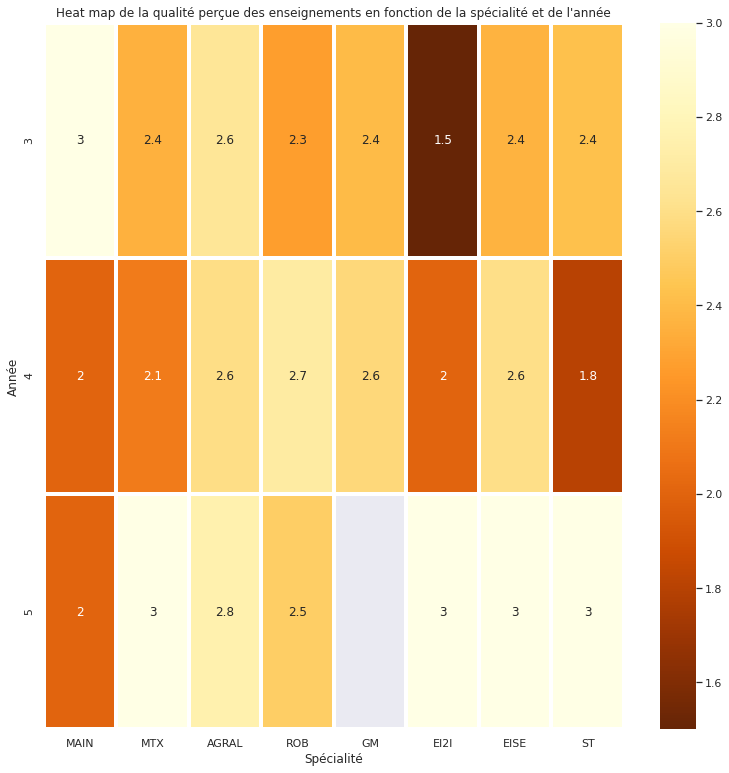

In [47]:
arr = np.zeros((3, 8))

for i in range(1, 4):
    for j in range(1, 9):
        DFtemp = DF[DF.annee == i+2]
        DFtemp = DFtemp[DFtemp.spe == j]
        arr[i-1, j-1] = DFtemp["qualité enseignements"].mean()
       
            

        
hm = sn.heatmap(arr, annot=True, linewidths=4, cmap = 'YlOrBr_r')
hm.set(xticklabels=["MAIN","MTX","AGRAL","ROB","GM","EI2I","EISE", "ST"])
hm.set(yticklabels=["3","4","5"])
plt.xlabel("Spécialité")
plt.ylabel("Année")
plt.title("Heat map de la qualité perçue des enseignements en fonction de la spécialité et de l'année")

*Pas de données pour les GM 5*


#### Heat map de la moyenne de concentration en cours en fonction de la spécialité et de l'année


Text(0.5, 1.0, "Heat map de la moyenne de concentration en cours en fonction de la spécialité et de l'année")

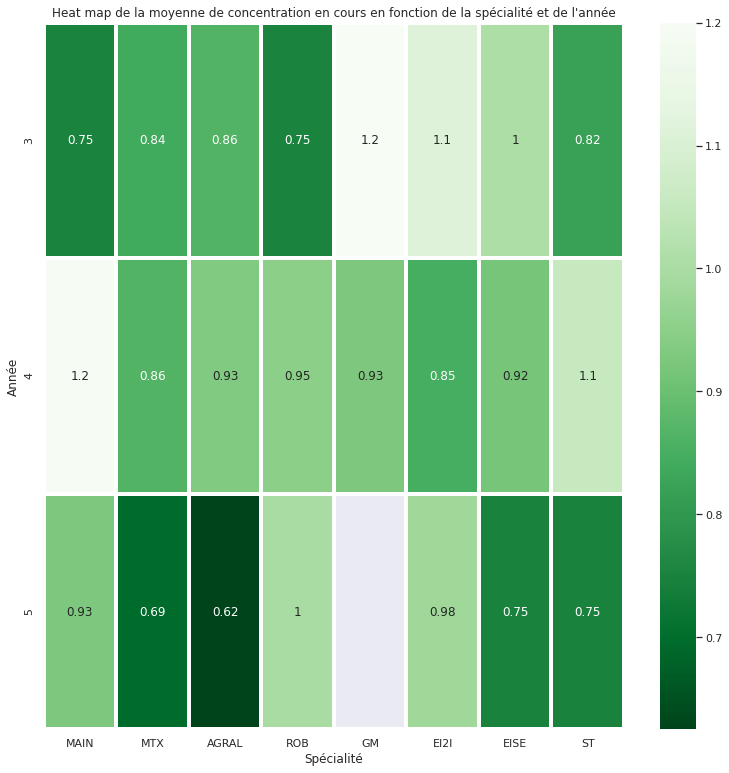

In [48]:
arr2 = np.zeros((3, 8))

for i in range(1, 4):
    for j in range(1, 9):
        DFtemp = DF[DF.annee == i+2]
        DFtemp = DFtemp[DFtemp.spe == j]
        arr2[i-1, j-1] = DFtemp["moyenne concentration cours"].mean()

        
hm = sn.heatmap(arr2, annot=True, linewidths=4, cmap = "Greens_r")
hm.set(xticklabels=["MAIN","MTX","AGRAL","ROB","GM","EI2I","EISE", "ST"])
hm.set(yticklabels=["3","4","5"])
plt.xlabel("Spécialité")
plt.ylabel("Année")

plt.title("Heat map de la moyenne de concentration en cours en fonction de la spécialité et de l'année")

*Pas de données Pour les GM 5*

#### Heat map du vécu du annuel en fonction de la spécialité et de l'année


Text(0.5, 1.0, "Heat map du vécu annuel en fonction de la spécialité et de l'année")

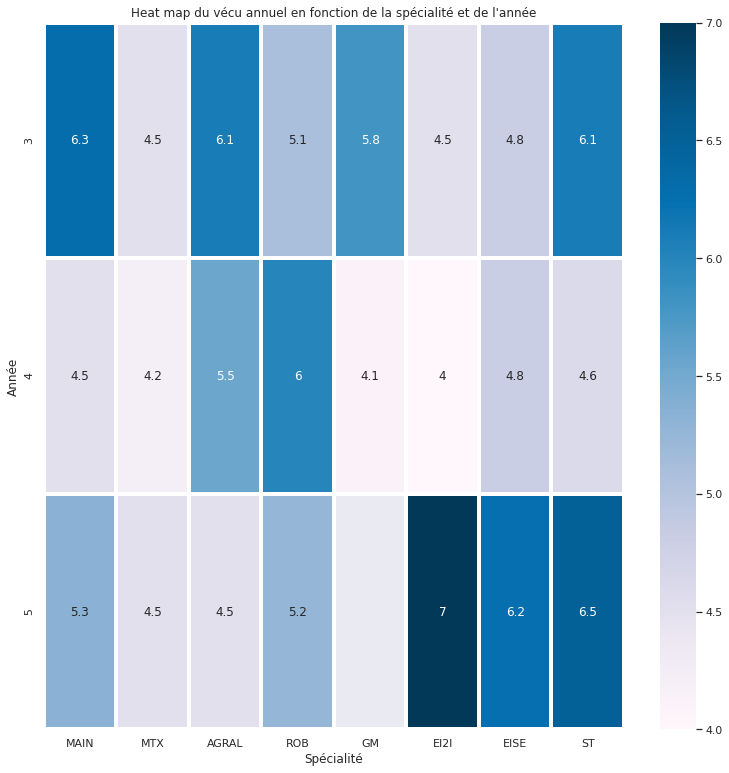

In [53]:
arr1 = np.zeros((3, 8))

for i in range(1, 4):
    for j in range(1, 9):
        DFtemp = DF[DF.annee == i+2]
        DFtemp = DFtemp[DFtemp.spe == j]
        arr1[i-1, j-1] = DFtemp["vecu an"].mean()

        
hm = sn.heatmap(arr1, annot=True, linewidths=4, cmap = "PuBu")
hm.set(xticklabels=["MAIN","MTX","AGRAL","ROB","GM","EI2I","EISE", "ST"])
hm.set(yticklabels=["3","4","5"])
plt.xlabel("Spécialité")
plt.ylabel("Année")
plt.title("Heat map du vécu annuel en fonction de la spécialité et de l'année")

*Pas de données Pour les GM 5*

#### Heat map du vécu semestriel en fonction de la spécialité et de l'année

Text(0.5, 1.0, "Heat map du vécu semestriel en fonction de la spécialité et de l'année")

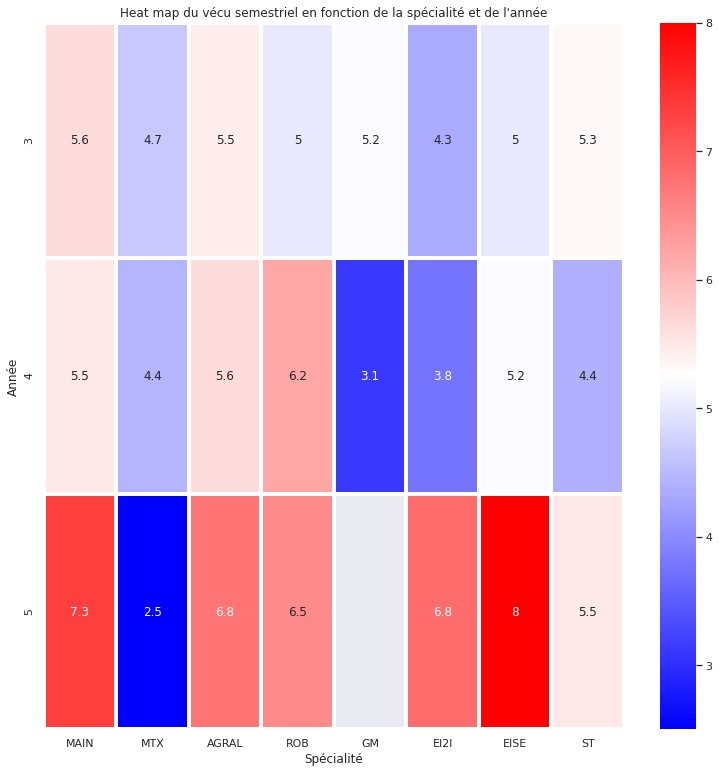

In [58]:
arr1 = np.zeros((3, 8))

for i in range(1, 4):
    for j in range(1, 9):
        DFtemp = DF[DF.annee == i+2]
        DFtemp = DFtemp[DFtemp.spe == j]
        arr1[i-1, j-1] = DFtemp["vecu sem"].mean()

        
hm = sn.heatmap(arr1, annot=True, linewidths=4, cmap = "bwr")
hm.set(xticklabels=["MAIN","MTX","AGRAL","ROB","GM","EI2I","EISE", "ST"])
hm.set(yticklabels=["3","4","5"])
plt.xlabel("Spécialité")
plt.ylabel("Année")
plt.title("Heat map du vécu semestriel en fonction de la spécialité et de l'année")

*Pas de données Pour les GM 5*

## Analyse des données textuelles

### Extraction des données textuelles

In [21]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
DFtext.columns = ['dev0', 'dev1', 'ameliorations', 'remarques', 'libre']

stringTable = []

for i in DFtext.columns:
    temp = ''
    for j in DFtext[i]:
        if j != "NaN":
            try:
                temp = temp + ' ' + j
            except Exception:
                pass
    stringTable.append(temp)
            



### Nuage de mots : "Tu peux développer si tu le souhaites :)" (Par rapport au vécu)

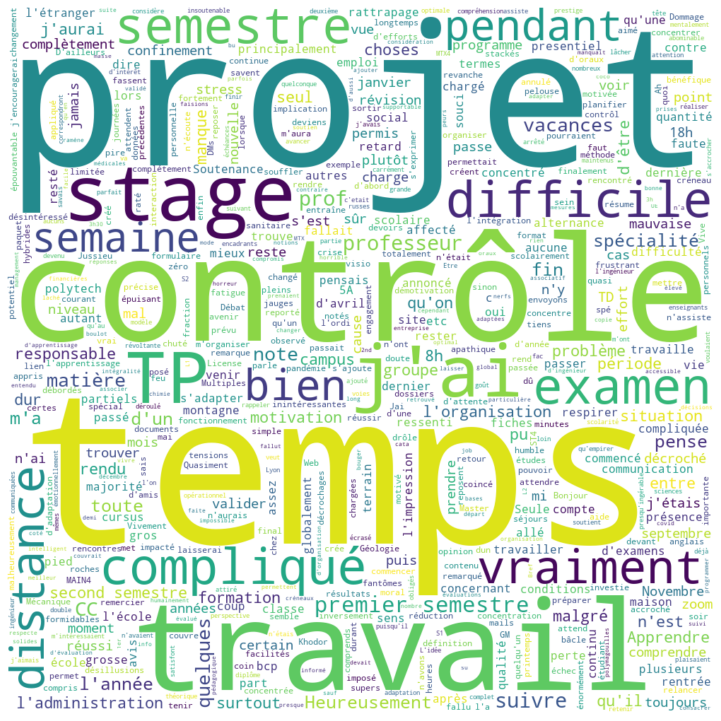

In [22]:
# Create and generate a word cloud image:
from stop_words import get_stop_words
stop_words = get_stop_words('french')
stop_words = stop_words + ["cours", "présentiel", "distanciel", "plus", "beaucoup", "c'est", "année"]
text = stringTable[0]
wordcloud = WordCloud(max_words = 1000, width = 1000, height = 1000, stopwords = stop_words, background_color="white").generate(text)
stopwords = set(STOPWORDS)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Nuage de mots : "Tu peux développer si tu le souhaites :)" (Par rapport à la qualité des enseignements)

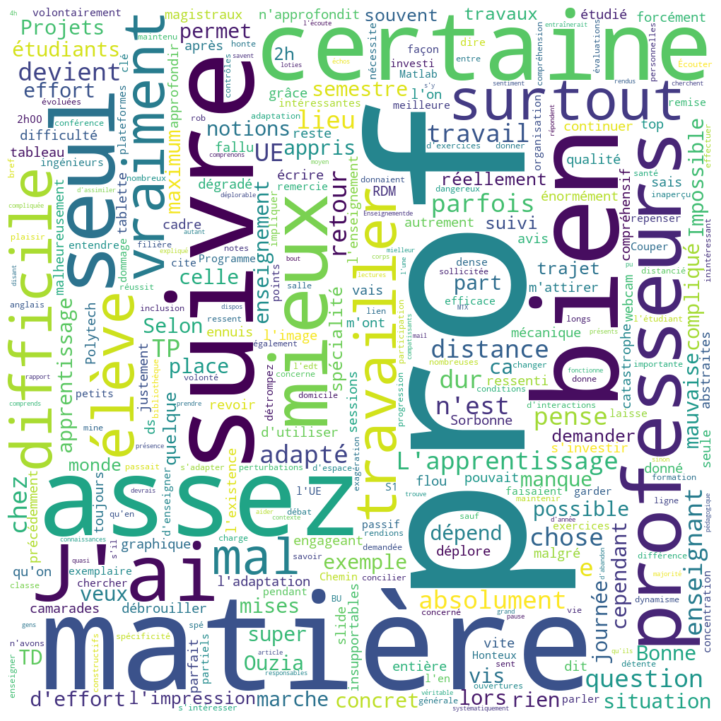

In [23]:
# Create and generate a word cloud image:
from stop_words import get_stop_words
stop_words = get_stop_words('french')
stop_words = stop_words + ["cours", "présentiel", "distanciel", "plus", "beaucoup", "c'est", "année", "certains"]
text = stringTable[1]
wordcloud = WordCloud(max_words = 1000, width = 1000, height = 1000, stopwords = stop_words, background_color="white").generate(text)
stopwords = set(STOPWORDS)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### Nuage de mots : Aurais-tu des idées d'amélioration de l'enseignement pour l'année prochaine ?

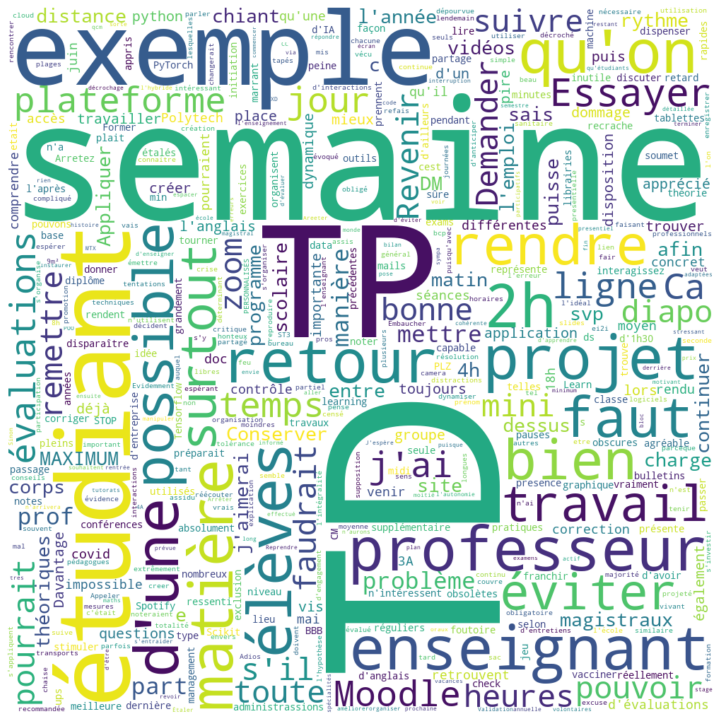

In [24]:
# Create and generate a word cloud image:
text = stringTable[2]
wordcloud = WordCloud(max_words = 1000, width = 1000, height = 1000, stopwords = stop_words, background_color="white").generate(text)
stopwords = set(STOPWORDS)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Nuage de mots : "Des remarques / questions pour l'administration ?"

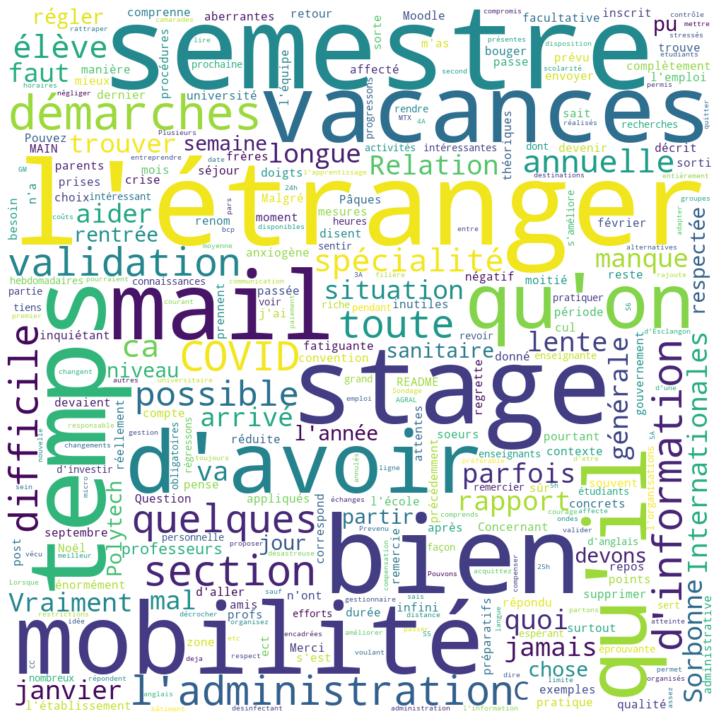

In [25]:
# Create and generate a word cloud image:
text = stringTable[3]
wordcloud = WordCloud(max_words = 1000, width = 1000, height = 1000, stopwords = stop_words, background_color="white").generate(text)
stopwords = set(STOPWORDS)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Nuage de mots : "Si tu veux nous dire quelque chose en plus, n'hésite pas ! Merci d'avoir pris le temps de répondre ;)"

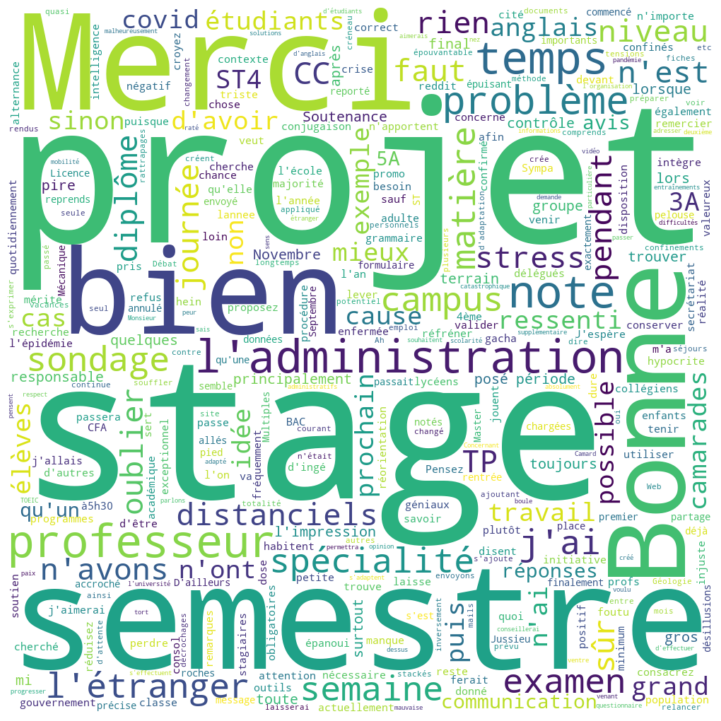

In [26]:
# Create and generate a word cloud image:
text = stringTable[4]
wordcloud = WordCloud(max_words = 1000, width = 1000, height = 1000, stopwords = stop_words, background_color="white").generate(text)
stopwords = set(STOPWORDS)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Nuage de mots : toutes les données textuelles

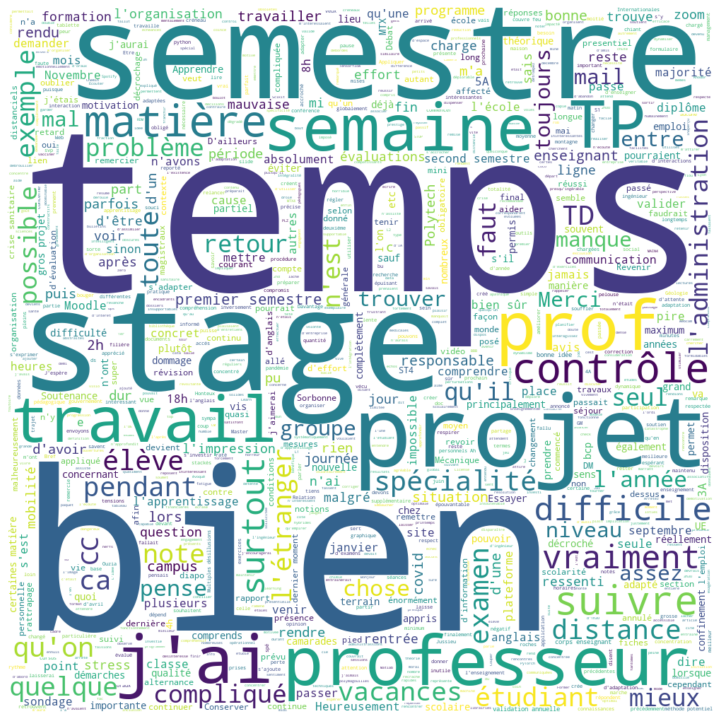

In [27]:
txt = ''
for i in stringTable:
    txt = txt + ' ' + i
    

text = txt
wordcloud = WordCloud(max_words = 1000, width = 1000, height = 1000, stopwords = stop_words, background_color="white").generate(text)
stopwords = set(STOPWORDS)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusion

Tout en réitérant que les données sont loint d'être conclusives car trop peu nombreuses, on peut remarquer quelques tendances :

- L'expérience est relativement hétérogène selon les spécialités et les promotions 
- L'expérience est nettement plus difficile pour les étudiants en altérnance 
- La plupart des élèves s'inquiètent des résultats
- Le niveau de concentration à distance des élèves dépend des spécialités
- L'encadrement des enseignants et la qualité de leurs cours sont indéniablement corréllés au vécu et aux résultats de l'étudiant. Ceci dit il est difficile de conclure dans quelle sens est la causalité. 